# Imports

In [538]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Visualizar Dataset

In [539]:
dataset = pd.read_csv('DataSet\StudentPerformanceFactors.csv')
dataset = dataset.dropna()
# Convert 'Yes' to 1 and 'No' to 0 for all columns in the dataset
dataset = dataset.replace({'Yes': 1, 'No': 0})
dataset.head()


C:\Users\54911\AppData\Local\Temp\ipykernel_6492\2321851433.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({'Yes': 1, 'No': 0})


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,0,7,73,Low,1,0,Low,Medium,Public,Positive,3,0,High School,Near,Male,67
1,19,64,Low,Medium,0,8,59,Low,1,2,Medium,Medium,Public,Negative,4,0,College,Moderate,Female,61
2,24,98,Medium,Medium,1,7,91,Medium,1,2,Medium,Medium,Public,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,Low,Medium,1,8,98,Medium,1,1,Medium,Medium,Public,Negative,4,0,High School,Moderate,Male,71
4,19,92,Medium,Medium,1,6,65,Medium,1,3,Medium,High,Public,Neutral,4,0,College,Near,Female,70


# Creacion de dummies

In [540]:
# Create dummy variables for categorical columns
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'School_Type', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
dataset = pd.get_dummies(dataset, columns=categorical_columns)
dataset = dataset.replace({True: 1, False: 0})
print(dataset.columns)
dataset.head()

Index(['Hours_Studied', 'Attendance', 'Extracurricular_Activities',
       'Sleep_Hours', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'Physical_Activity', 'Learning_Disabilities',
       'Exam_Score', 'Parental_Involvement_High', 'Parental_Involvement_Low',
       'Parental_Involvement_Medium', 'Access_to_Resources_High',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Motivation_Level_High', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Family_Income_High', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_High', 'Teacher_Quality_Low',
       'Teacher_Quality_Medium', 'Peer_Influence_Negative',
       'Peer_Influence_Neutral', 'Peer_Influence_Positive',
       'School_Type_Private', 'School_Type_Public',
       'Parental_Education_Level_College',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Far',
       'Distance_from_Home_Moderate', 'Dist

C:\Users\54911\AppData\Local\Temp\ipykernel_6492\1052431561.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({True: 1, False: 0})


,Hours_Studied,Attendance,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Tutoring_Sessions,Physical_Activity,Learning_Disabilities,Exam_Score,...,School_Type_Private,School_Type_Public,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,0,7,73,1,0,3,0,67,...,0,1,0,1,0,0,0,1,0,1
1,19,64,0,8,59,1,2,4,0,61,...,0,1,1,0,0,0,1,0,1,0
2,24,98,1,7,91,1,2,4,0,74,...,0,1,0,0,1,0,0,1,0,1
3,29,89,1,8,98,1,1,4,0,71,...,0,1,0,1,0,0,1,0,0,1
4,19,92,1,6,65,1,3,4,0,70,...,0,1,1,0,0,0,0,1,1,0


In [541]:
X = dataset.drop('Exam_Score', axis=1).astype(float)
y = dataset['Exam_Score'].astype(float)

# Regresion Lineal

## Regresion Lineal Aleatoria

In [542]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)
print('MSE:', mean_squared_error(y_test, predictions))
print(model.summary())

MSE: 4.65559495986037
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     502.1
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:18:12   Log-Likelihood:                -10883.
No. Observations:                5102   AIC:                         2.182e+04
Df Residuals:                    5074   BIC:                         2.201e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

## Regresion Lineal Con Mejor Fold

### Cross Validation

In [543]:
CrossValidation = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5)
print('Cross Validation:', CrossValidation)
print('Mean Cross Validation:', np.mean(CrossValidation))

Cross Validation: [6.07574992 4.3824955  4.52554534 4.17425859 2.38019644]
Mean Cross Validation: 4.307649158607022


In [544]:

x_train = X[:int(0.8*len(X))]
x_test = X[int(0.8*len(X)):]
y_train = y[:int(0.8*len(y))]
y_test = y[int(0.8*len(y)):]
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_test)
mse_regresion_lineal = mean_squared_error(y_test, predictions)
r2_regresion_lineal = r2_score(y_test, predictions)
coeficientes_regresion_lineal = model.params
print('MSE:', mse_regresion_lineal)
print(model.summary())

MSE: 2.3783535887854814
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     425.7
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:18:12   Log-Likelihood:                -11210.
No. Observations:                5102   AIC:                         2.248e+04
Df Residuals:                    5074   BIC:                         2.266e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

# Lasso

In [545]:
def findBestAlpha(X, y, alphas):
    mse = []
    r2_scores = []
    for alpha in alphas:
        model = Lasso(alpha=alpha)
        cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        # Calcular el MSE usando validación cruzada (neg_mean_squared_error)
        mse_value = np.mean(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10))
        r2_score_value = np.mean(cross_val_score(model, X, y, scoring='r2', cv=10))
        r2_scores.append(r2_score_value)
        mse.append(mse_value)
    
    # Encontrar el alpha que minimiza el MSE
    best_alpha = alphas[np.argmin(mse)]
    return best_alpha, mse, r2_scores

MSE: 2.417783663550676
El mejor alpha es: 0.01


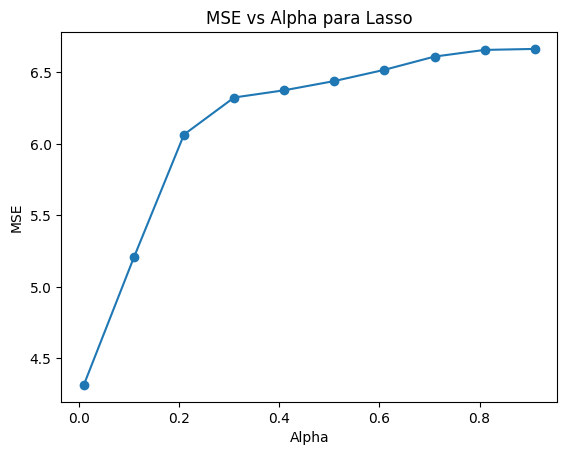

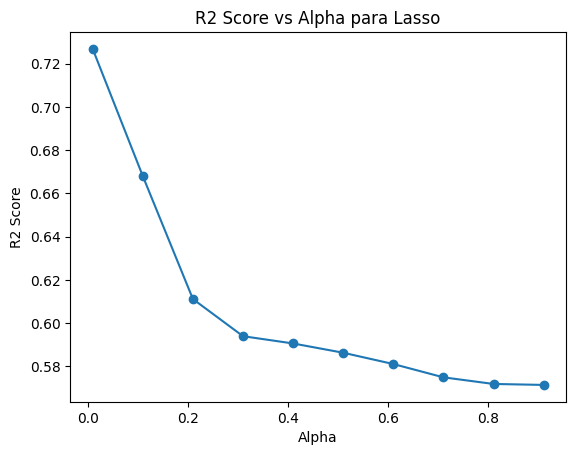

In [546]:
alphas = np.arange(0.01, 1, 0.1)

best_alpha, mse_values, bestr2_score = findBestAlpha(X, y, alphas)



lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)
predictions = lasso.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

print(f"El mejor alpha es: {best_alpha}")

plt.plot(alphas, mse_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha para Lasso')
plt.show()

plt.plot(alphas, bestr2_score, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Alpha para Lasso')
plt.show()

In [547]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
predictions = lasso.predict(x_test)
print('MSE:', mean_squared_error(y_test, predictions))
print('R2:', r2_score(y_test, predictions))
columnsToDrop = []
for columna in range(len(X.columns)):
    if lasso.coef_[columna] > -0.05 and lasso.coef_[columna] < 0.05:
        columnsToDrop.append(X.columns[columna])
        print(X.columns[columna], lasso.coef_[columna])   
mse_lasso = mean_squared_error(y_test, predictions)
r2_lasso = r2_score(y_test, predictions)
coeficientes_lasso = lasso.coef_

MSE: 2.417783663550676
R2: 0.835016869976934
Sleep_Hours 0.0
Previous_Scores 0.04785615796671366
Parental_Involvement_Medium -0.0
Access_to_Resources_Medium 0.0
Motivation_Level_Medium -0.0
Family_Income_Medium 0.0
Teacher_Quality_Medium -0.0
Peer_Influence_Neutral -0.0
School_Type_Private 0.0
School_Type_Public -0.0
Parental_Education_Level_College -0.0
Distance_from_Home_Moderate -0.0
Gender_Female 0.0
Gender_Male -0.0


# Ridge

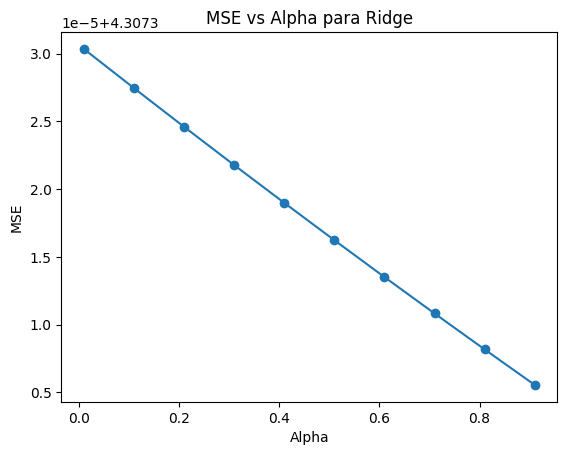

In [548]:
def best_alpha_ridge(X, y, alphas):
    mse = []
    r2_scores = []
    for alpha in alphas:
        model = Ridge(alpha=alpha)
        mse_value = np.mean(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10))
        r2_score_value = np.mean(cross_val_score(model, X, y, scoring='r2', cv=10))
        r2_scores.append(r2_score_value)
        mse.append(mse_value)
    
    best_alpha = alphas[np.argmin(mse)]
    return best_alpha, mse, r2_scores

alphas = np.arange(0.01, 1, 0.1)
best_alpha, mse_values, bestr2_score = best_alpha_ridge(X, y, alphas)

plt.plot(alphas, mse_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha para Ridge')
plt.show()

In [549]:
Ridge = Ridge(alpha=best_alpha)
Ridge.fit(x_train, y_train)
predictions = Ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, predictions)
r2_ridge = r2_score(y_test, predictions)
coeficientes_ridge = Ridge.coef_
print(f'MSE: {mse_ridge}')
print(f'R2: {r2_ridge}')


MSE: 2.378639388401782
R2: 0.837687971256138


# Regresion Polinomica

In [550]:
def findBestPolinomialDegree(X,y):
    degrees = [1,2,3] 
    r2_train = []
    mse = []
    for grado in degrees:
        poly = PolynomialFeatures(grado)
        X_poly = poly.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        r2_train.append(r2_score(y_train, model.predict(X_train)))
        mse.append(np.mean((y_test - y_pred)**2))
    return degrees, r2_train, mse

def BestDegree(dic):
    best = 0
    for i in range(len(dic["degree"])):
        if dic["mse"][i] < dic["mse"][best]:
            best = i
    print("Mejor grado de polinomio: ", dic["grado"][best], " R2: ", dic["r2_train"][best], " MSE: ", dic["mse"][best])
    return dic["degree"][best]

# best_degre, r2_train_score, mse_values = findBestPolinomialDegree(X,y)

# plt.plot(best_degre, mse_values, marker='o')
# plt.xlabel('Degree')
# plt.ylabel('MSE')
# plt.title('MSE vs Degree for Polynomial Regression')
# plt.show()

# plt.plot(best_degre, r2_train_score, marker='o')
# plt.xlabel('Degree')
# plt.ylabel('R2 Score')
# plt.title('R2 Score vs Degree for Polynomial Regression')
# plt.show()


In [551]:
PolynomialFeatures = PolynomialFeatures(2)
X_poly = PolynomialFeatures.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
mse_polinomial = mean_squared_error(y_test, predictions)
r2_polinomial = r2_score(y_test, predictions)
coeficientes_polynomial = model.params[:len(x_train.columns)]
print('MSE:', mse_polinomial)
print('R2:', r2_polinomial)


MSE: 4.619425030502589
R2: 0.7027267893313709


# Comparacion entre Regresion lineal, polinomica, Ridge, Lasso

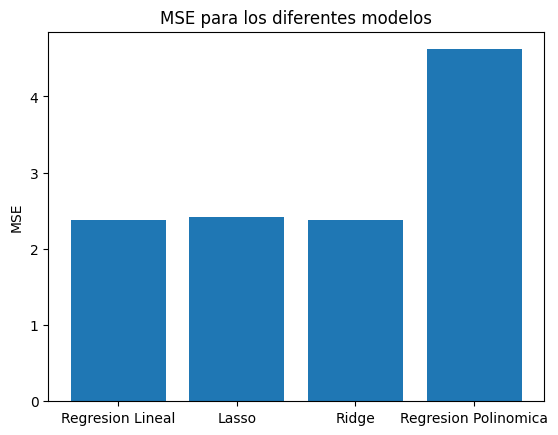

In [552]:
plt.bar(['Regresion Lineal', 'Lasso', 'Ridge', 'Regresion Polinomica'], [mse_regresion_lineal, mse_lasso, mse_ridge, mse_polinomial])
plt.ylabel('MSE')
plt.title('MSE para los diferentes modelos')
plt.show()


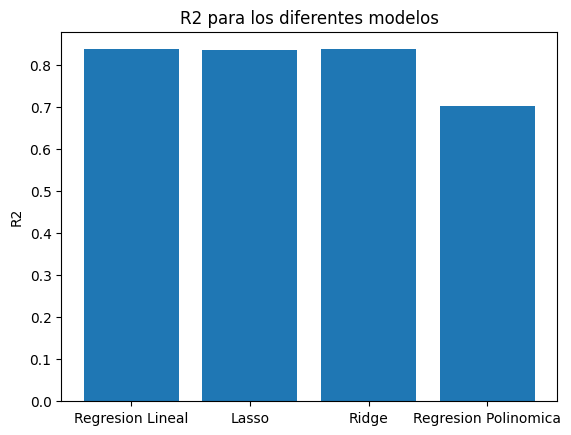

In [553]:
plt.bar(['Regresion Lineal', 'Lasso', 'Ridge', 'Regresion Polinomica'], [r2_regresion_lineal, r2_lasso, r2_ridge, r2_polinomial])
plt.ylabel('R2')
plt.title('R2 para los diferentes modelos')
plt.show()

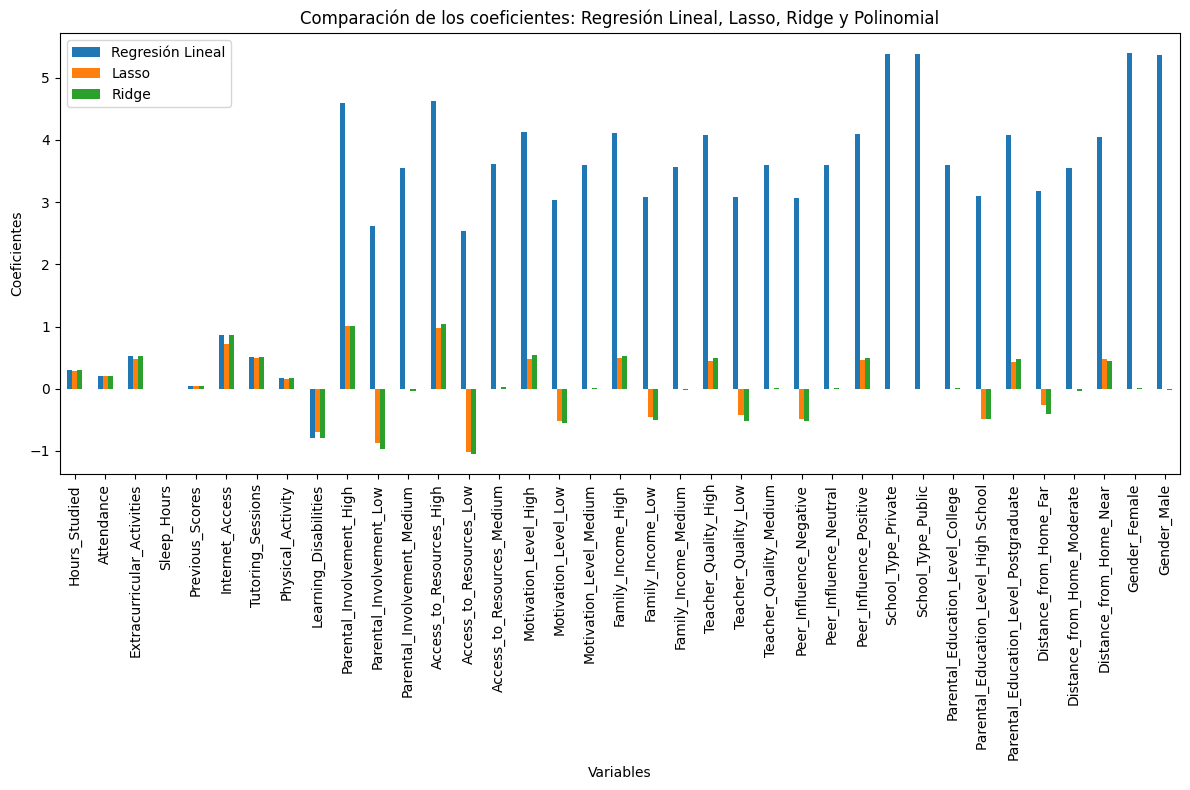

In [554]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

coef_dict = {
    'Variable': x_train.columns, 
    'Regresión Lineal': coeficientes_regresion_lineal,
    'Lasso': coeficientes_lasso,
    'Ridge': coeficientes_ridge,
    
}

coef_df = pd.DataFrame(coef_dict)

fig, ax = plt.subplots(figsize=(12, 8))

coef_df.set_index('Variable').plot(kind='bar', ax=ax)

ax.set_ylabel('Coeficientes')
ax.set_xlabel('Variables')
ax.set_title('Comparación de los coeficientes: Regresión Lineal, Lasso, Ridge y Polinomial')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# Funciones utilizadas para clasificacion

In [555]:
def classify(model, X, threshold):
  y_pred_proba = model.predict_proba(X)
  y_pred = []
  for pred in y_pred_proba:
    if pred[1] >= threshold:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

def cm(prediction, actual):
  tn = 0
  fn = 0
  fp = 0
  tp = 0
  i = 0
  for y_true in actual:
    if(prediction[i] == 1):      
      if(y_true == 1):
        tp+=1
      else:
        fp+=1              
    else:
      if(y_true == 1):           
        fn+=1
      else:
        tn+=1                     
    i+=1
  return tn, fn, fp, tp

def accuracy(tp, tn, fp, fn):
  return (tp + tn) / (tp + tn + fp + fn)

def tpr(tp, tn, fp, fn):
  return tp / (tp + fn)

def precision(tp, tn, fp, fn):
  return tp / (tp + fp)

def fpr(tp, tn, fp, fn):
  return fp / (fp + tn)

threshold = 68
y_boolean = (y >= threshold).astype(int)
print("Positive class: ", sum(y_boolean))
print("Negative class: ", len(y_boolean) - sum(y_boolean))

Positive class:  2918
Negative class:  3460


# Regresion Logisitca

In [556]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=0)  

clf = LogisticRegression(random_state=0, max_iter=100).fit(x_train, y_train)

y_pred = classify(clf, x_test, 0.68)
score = sum(y_pred == y_test) / len(y_test)
print('Score con threshold = 70: ', score)

tn, fn, fp, tp = cm(y_pred, y_test)

clfAccuracy = accuracy(tp, tn, fp, fn)
clfRocAuc = roc_auc_score(y_test, y_pred)
clfTpr = tpr(tp, tn, fp, fn)
clfPrecision = precision(tp, tn, fp, fn)
clfFpr = fpr(tp, tn, fp, fn)


print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {clfAccuracy:.4f}")
print(f"TPR/Recall:   {clfTpr:.4f}")
print(f"Precision:   {clfPrecision:.4f}")
print(f"FPR:   {clfFpr:.4f}")
print('ROC AUC Score:', clfRocAuc)


Score con threshold = 70:  0.9020376175548589
Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     23            492
Predicted 0     659             102
-----------------------------
Accuracy:   0.9020
TPR/Recall:   0.8283
Precision:   0.9553
FPR:   0.0337
ROC AUC Score: 0.8972792440534376


c:\Users\54911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Cross Validation 

In [557]:
model = LogisticRegression()
cv_lr = cross_val_score(model, X, y_boolean)
print(cv_lr)
print(np.mean(cv_lr))

c:\Users\54911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\54911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[0.94670846 0.89655172 0.95219436 0.96862745 0.95215686]
0.9432477718360073


c:\Users\54911\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

## KNN con 3 vecinos

In [558]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=0)    
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
predictions = classify(knn, x_test, 0.68)
print('Matriz de Confusion: ')
print(confusion_matrix(y_test, predictions))
print('ROC AUC Score:', roc_auc_score(y_test, predictions))


Matriz de Confusion: 
[[655  27]
 [227 367]]
ROC AUC Score: 0.7891278375149344


## KNN con Cross Validation

### Encontrar mejor cantidad de vecinos

In [559]:
# def findBestNeighnorValue(X, y, neighbor_values):
#     accuracy_scores = []
#     roc_auc_scores = []
#     for neighbor in neighbor_values:
#         model = KNeighborsClassifier(n_neighbors=neighbor)
#         accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
#         roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
#     best_neighbor = neighbor_values[np.argmax(accuracy_scores)]
#     return best_neighbor, accuracy_scores, roc_auc_scores

# arreglo = np.arange(1, 25, 1)  # Define a valid range for neighbor values
# best_neighbor, accur, roc_auc_scores = findBestNeighnorValue(X, y_boolean, arreglo)
# print(f'Best neighbor value: {best_neighbor}')

### Grafico

In [560]:
# for i in range(len(accur)):
#     print("para k =",i+1 ," ACCURACY: ", accur[i], " ROC AUC: ", roc_auc_scores[i])

# plt.plot(arreglo, accur, marker='o')
# plt.xlabel('Neighbor')
# plt.ylabel('ACCURACY')
# plt.title('ACCURACY vs Neighbor for KNN')
# plt.show()

# plt.plot(arreglo, roc_auc_scores, marker='o')
# plt.xlabel('Neighbor')
# plt.ylabel('ROC AUC Score')
# plt.title('ROC AUC Score vs Neighbor for KNN')
# plt.show()

### Matriz de confusion para KNN

In [561]:
knnModel = KNeighborsClassifier(n_neighbors=11).fit(x_train, y_train)
y_pred = classify(knnModel, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)
knnModelAccuracy = accuracy(tp, tn, fp, fn)
knnModelRocAuc = roc_auc_score(y_test, y_pred)
knnModelTpr = tpr(tp, tn, fp, fn)
knnModelPrecision = precision(tp, tn, fp, fn)
knnModelFpr = fpr(tp, tn, fp, fn)




print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {knnModelAccuracy:.4f}")
print(f"TPR/Recall:   {knnModelTpr:.4f}")
print(f"Precision:   {knnModelPrecision:.4f}")
print(f"FPR:   {knnModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', knnModelRocAuc)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     36            426
Predicted 0     646             168
-----------------------------
Accuracy:   0.8401
TPR/Recall:   0.7172
Precision:   0.9221
FPR:   0.0528
-----------------------------
ROC AUC Score: 0.8321928967090257


# Arboles de Marihuana

## Arbol de decision con profundidad maxima de 15

In [562]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier(min_samples_leaf=21,
                                  min_samples_split=40,
                                  max_depth=15).fit(x_train, y_train)
y_predicion = classify(clf, x_test, 0.68)
print("Score del arbol: ",clf.score(x_test, y_test))
print("Profundidad del arbol: ", clf.get_depth())
print("cantida de hojas: ",clf.get_n_leaves())
print("ROC AUC Score:", roc_auc_score(y_test, y_predicion))



Score del arbol:  0.8385579937304075
Profundidad del arbol:  10
cantida de hojas:  127
ROC AUC Score: 0.8219544846050871


## Arbol de decision con cross validation

### Encontar mejor profundidad del arbol para maximizar accuracy

Mejor profundidad para el arbol: 8


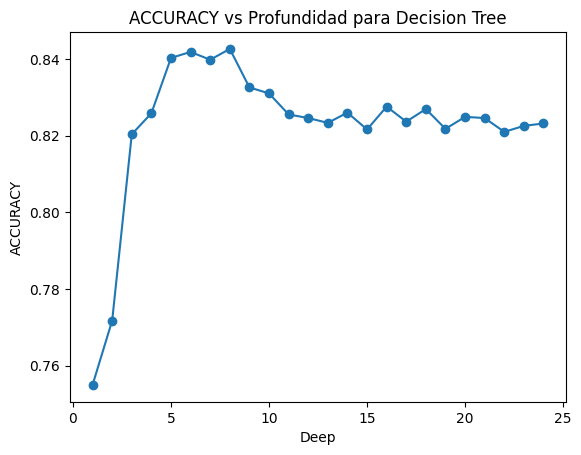

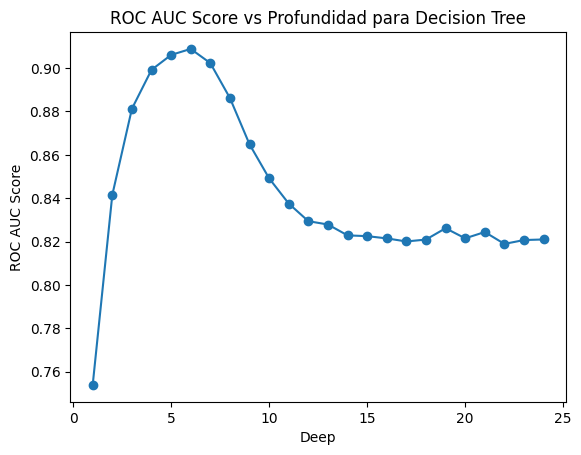

In [563]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
def findBestDeep(X, y, deep_values):
    accuracy_scores = []
    roc_auc_scores = []
    for deep in deep_values:
        model = tree.DecisionTreeClassifier(max_depth=deep)
        accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
        roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
    best_deep = deep_values[np.argmax(accuracy_scores)]
    return best_deep, accuracy_scores, roc_auc_scores

deep_values = np.arange(1, 25, 1)
best_deep, accur, roc_auc_scores = findBestDeep(X, y_boolean, deep_values)
print(f'Mejor profundidad para el arbol: {best_deep}')

plt.plot(deep_values, accur, marker='o')
plt.xlabel('Deep')
plt.ylabel('ACCURACY')
plt.title('ACCURACY vs Profundidad para Decision Tree')
plt.show()

plt.plot(deep_values, roc_auc_scores, marker='o')
plt.xlabel('Deep')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score vs Profundidad para Decision Tree')
plt.show()


### Bias-variance trade-off en arbol de clasifiacion

0.1520376175548589 8
0.0 16


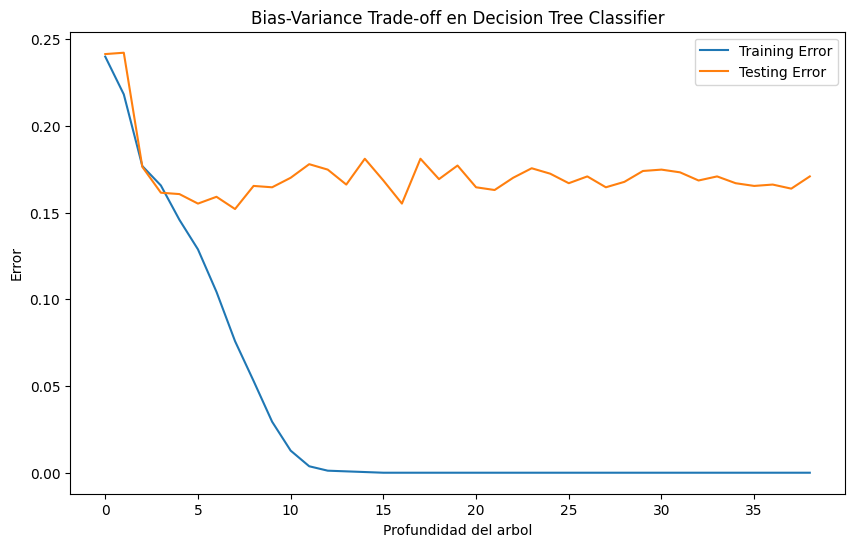

0.0007840062720502194 0.16614420062695923 0.8228507183869341
0.05292042336338687 0.16536050156739812 0.8648317949823117


In [564]:
X_train, X_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

train_error = []
test_error = []
for i in range(1,40):
  model = tree.DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
  train_error.append(1 - model.score(X_train, y_train))
  test_error.append(1 - model.score(X_test, y_test))
print(min(test_error), np.argmin(test_error)+1)
print(min(train_error), np.argmin(train_error)+1)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(train_error)), train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(test_error)), test_error, label='Testing Error')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off en Decision Tree Classifier')
plt.legend()

plt.show()

print(train_error[13], test_error[13], roc_auc_scores[13])
print(train_error[8], test_error[8], roc_auc_scores[8])

### Matriz de confusion para el arbol de clasificacion con mayor accuracy

In [565]:
TreeModel = tree.DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
y_pred = classify(TreeModel, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)
TreeModelAccuracy = accuracy(tp, tn, fp, fn)
TreeModelRoCAUC = roc_auc_score(y_test, y_pred)
TreeModelTpr = tpr(tp, tn, fp, fn)
TreeModelPrecision = precision(tp, tn, fp, fn)
TreeModelFpr = fpr(tp, tn, fp, fn)


print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {TreeModelAccuracy:.4f}")
print(f"TPR/Recall:   {TreeModelTpr:.4f}")
print(f"Precision:   {TreeModelPrecision:.4f}")
print(f"FPR:   {TreeModelFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', TreeModelRoCAUC)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     56            466
Predicted 0     608             146
-----------------------------
Accuracy:   0.8417
TPR/Recall:   0.7614
Precision:   0.8927
FPR:   0.0843
-----------------------------
ROC AUC Score: 0.838550279549571


# Random gay

## Random Forest Tree estandar

In [566]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
randomForestModel= RandomForestClassifier(n_estimators=10, max_depth=100, random_state=0)
randomForestModel.fit(x_train, y_train)
predictions = classify(randomForestModel, x_test, 0.68)
print('Matriz de Confusion: ')
print(confusion_matrix(y_test, predictions))
print('ROC AUC Score:', roc_auc_score(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, y_predicion))
print("R2: ", r2_score(y_test, y_predicion))
print("R2 adjusted: ", 1 - (1 - r2_score(y_test, y_predicion)) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1))

Matriz de Confusion: 
[[646  18]
 [224 388]]
ROC AUC Score: 0.8034392471848177
MSE:  0.17398119122257052
R2:  0.30291755256319397
R2 adjusted:  0.28208390914222314


## Random Forest Tree con cross validation

### Encontrar mejores estimadores para el Random Forest Tree

In [567]:
# x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

# def findBestN(X, y, n_values):
#     accuracy_scores = []
#     roc_auc_scores = []
#     for n in n_values:
#         model = RandomForestClassifier(n_estimators=n)
#         accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
#         roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
#     best_n = n_values[np.argmax(accuracy_scores)]
#     return best_n, accuracy_scores, roc_auc_scores

# n_values = np.arange(1, 25, 1)
# best_n, accur, roc_auc_scores = findBestN(X, y_boolean, n_values)
# print(f'Best n value: {best_n}')


# plt.plot(n_values, accur, marker='o')
# plt.xlabel('N')
# plt.ylabel('ACCURACY')
# plt.title('ACCURACY vs N for Random Forest')
# plt.show()

# plt.plot(n_values, roc_auc_scores, marker='o')
# plt.xlabel('N')
# plt.ylabel('ROC AUC Score')
# plt.title('ROC AUC Score vs N for Random Forest')
# plt.show()

In [568]:
# x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

# def findBestDepth(X, y, depth_values):
#     accuracy_scores = []
#     roc_auc_scores = []
#     for depth in depth_values:
#         model = RandomForestClassifier(max_depth=depth)
#         accuracy_scores.append(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=10)))
#         roc_auc_scores.append(np.mean(cross_val_score(model, X, y, scoring='roc_auc', cv=10)))
#     best_depth = depth_values[np.argmax(accuracy_scores)]
#     return best_depth, accuracy_scores, roc_auc_scores

# depth_values = np.arange(1, 25, 1)
# best_depth, accur, roc_auc_scores = findBestDepth(X, y_boolean, depth_values)
# print(f'Best depth value: {best_depth}')


# plt.plot(depth_values, accur, marker='o')
# plt.xlabel('Depth')
# plt.ylabel('ACCURACY')
# plt.title('ACCURACY vs Depth for Random Forest')
# plt.show()

# plt.plot(depth_values, roc_auc_scores, marker='o')
# plt.xlabel('Depth')
# plt.ylabel('ROC AUC Score')
# plt.title('ROC AUC Score vs Depth for Random Forest')
# plt.show()

### Bias-variance trade-off en Random Forest Tree

0.08934169278996862 12
0.0 14


Text(0.5, 1.0, 'Bias-Variance Trade-off en Random Forest Classifier')

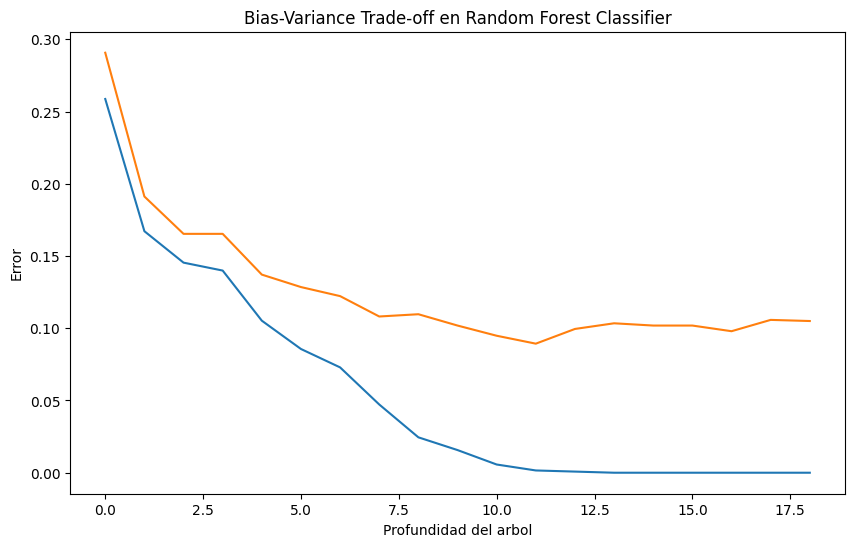

In [569]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
train_error = []
test_error = []
for i in range(1,20):
  model = RandomForestClassifier(max_depth=i).fit(x_train, y_train)
  train_error.append(1 - model.score(x_train, y_train))
  test_error.append(1 - model.score(x_test, y_test))
print(min(test_error), np.argmin(test_error)+1)
print(min(train_error), np.argmin(train_error)+1)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(train_error)), train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(test_error)), test_error, label='Testing Error')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off en Random Forest Classifier')



### Matriz de confusion para el Random Forest Tree

In [570]:
RandomForestTree = RandomForestClassifier(max_depth=18, n_estimators=23).fit(x_train, y_train)
y_pred = classify(RandomForestTree, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)

RandomForestTreeAccuracy = accuracy(tp, tn, fp, fn)
RandomForestTreeRocAuc = roc_auc_score(y_test, y_pred)
RandomForestTreeTpr = tpr(tp, tn, fp, fn)
RandomForestTreePrecision = precision(tp, tn, fp, fn)
RandomForestTreeFpr = fpr(tp, tn, fp, fn)


print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {RandomForestTreeAccuracy:.4f}")
print(f"TPR/Recall:   {RandomForestTreeTpr:.4f}")
print(f"Precision:   {RandomForestTreePrecision:.4f}")
print(f"FPR:   {RandomForestTreeFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', RandomForestTreeRocAuc)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     5            374
Predicted 0     659             238
-----------------------------
Accuracy:   0.8096
TPR/Recall:   0.6111
Precision:   0.9868
FPR:   0.0075
-----------------------------
ROC AUC Score: 0.8017904953145917


# XGAY

## Arbol XGB con estimadores por default de 100

In [571]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
modelXGB= xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
modelXGB.fit(x_train, y_train)
predictions = classify(modelXGB, x_test, 0.68)
print('Matriz de Confusion: ')
print(confusion_matrix(y_test, predictions))
print('ROC AUC Score:', roc_auc_score(y_test, predictions))

Matriz de Confusion: 
[[645  19]
 [ 60 552]]
ROC AUC Score: 0.9366731632412


## Arbol XGB  con mejor estimador

### Encontrar el mejor estimador para el arbol XGB

Mejor valor de n: 79


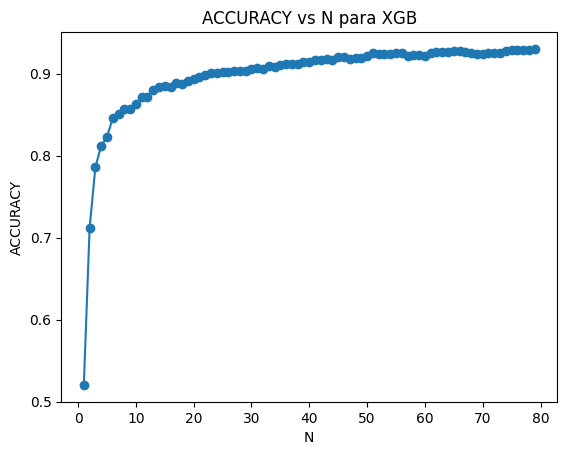

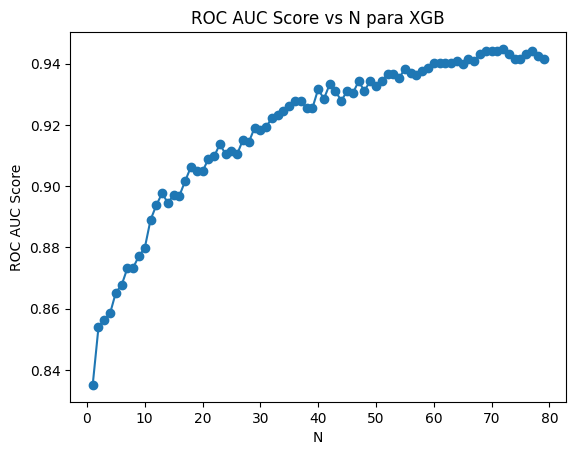

In [572]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)

def findBestN(X, y, n_values):
    accuracy_scores = []
    roc_auc_scores = []
    for n in n_values:
        model = xgb.XGBClassifier(n_estimators=n)
        model.fit(x_train, y_train)
        tn,fn,fp, tp  = cm( classify(model, x_test, 0.68), y_test)
        accuracyScore = accuracy(tp, tn, fp, fn)
        accuracy_scores.append(accuracyScore)
        
        roc_auc = roc_auc_score(y_test, model.predict(x_test))
        roc_auc_scores.append(roc_auc)
    
    best_n = n_values[np.argmax(accuracy_scores)]
    return best_n, accuracy_scores, roc_auc_scores

n_values = np.arange(1, 80, 1)
best_n, accur, roc_auc_scores = findBestN(X, y_boolean, n_values)
print(f'Mejor valor de n: {best_n}')


plt.plot(n_values, accur, marker='o')
plt.xlabel('N')
plt.ylabel('ACCURACY')
plt.title('ACCURACY vs N para XGB')
plt.show()

plt.plot(n_values, roc_auc_scores, marker='o')
plt.xlabel('N')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score vs N para XGB')
plt.show()


### Bias-variance trade-off del arbol XGB

0.054858934169279006 72
0.0005880047040376368 76


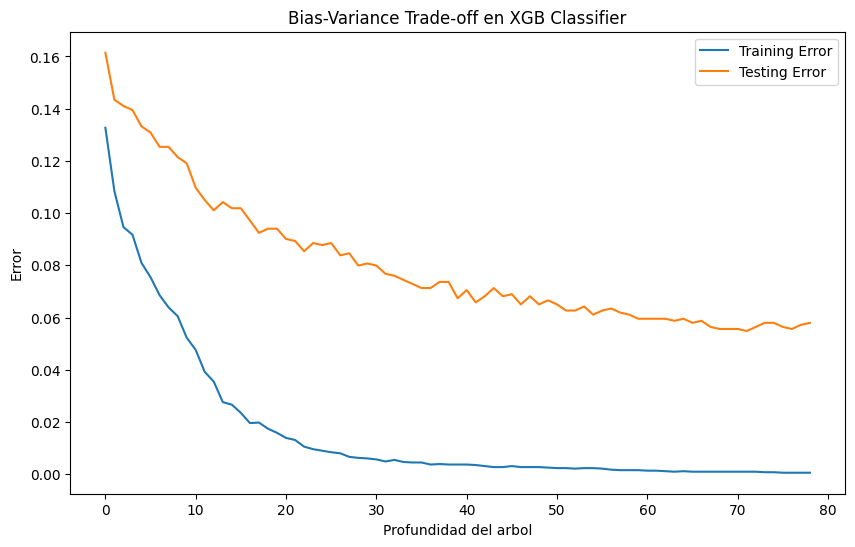

In [573]:
x_train, x_test, y_train, y_test = train_test_split(X, y_boolean, test_size=0.2, random_state=42)
x_train_error = []
x_test_error = []
for i in range(1,80):
  model = xgb.XGBClassifier(n_estimators=i).fit(x_train, y_train)
  x_train_error.append(1 - model.score(x_train, y_train))
  x_test_error.append(1 - model.score(x_test, y_test))
print(min(x_test_error), np.argmin(x_test_error)+1)
print(min(x_train_error), np.argmin(x_train_error)+1)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(start=0, stop=len(x_train_error)), x_train_error, label='Training Error')
plt.plot(np.arange(start=0, stop=len(x_test_error)), x_test_error, label='Testing Error')
plt.xlabel('Profundidad del arbol')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off en XGB Classifier')
plt.legend()


### Matriz de Confusion para el Arbol XGB con mejor cantidad de estimadores

In [574]:
ArbolXGB = xgb.XGBClassifier(n_estimators=59).fit(x_train, y_train)
y_pred = classify(ArbolXGB, x_test, 0.68)

tn, fn, fp, tp = cm(y_pred, y_test)

ArbolXgbAccuracy = accuracy(tp, tn, fp, fn)
ArbolXGBRocAuc = roc_auc_score(y_test, y_pred)
ArbolXGBTpr = tpr(tp, tn, fp, fn)
ArbolXGBPrecision = precision(tp, tn, fp, fn)
ArbolXGBFpr = fpr(tp, tn, fp, fn)


print("Matriz de Confusion:")
print(f"              Actual 0       Actual 1")
print(f"Predicted 1     {fp}            {tp}")
print(f"Predicted 0     {tn}             {fn}")
print("-----------------------------")
print(f"Accuracy:   {ArbolXgbAccuracy:.4f}")
print(f"TPR/Recall:   {ArbolXGBTpr:.4f}")
print(f"Precision:   {ArbolXGBPrecision:.4f}")
print(f"FPR:   {ArbolXGBFpr:.4f}")
print("-----------------------------")
print('ROC AUC Score:', ArbolXGBRocAuc)

Matriz de Confusion:
              Actual 0       Actual 1
Predicted 1     17            530
Predicted 0     647             82
-----------------------------
Accuracy:   0.9224
TPR/Recall:   0.8660
Precision:   0.9689
FPR:   0.0256
-----------------------------
ROC AUC Score: 0.9202053311284353


# Comparacion de los diferentes modelos de clasificacion

## Accuracy y Roc-Auc score

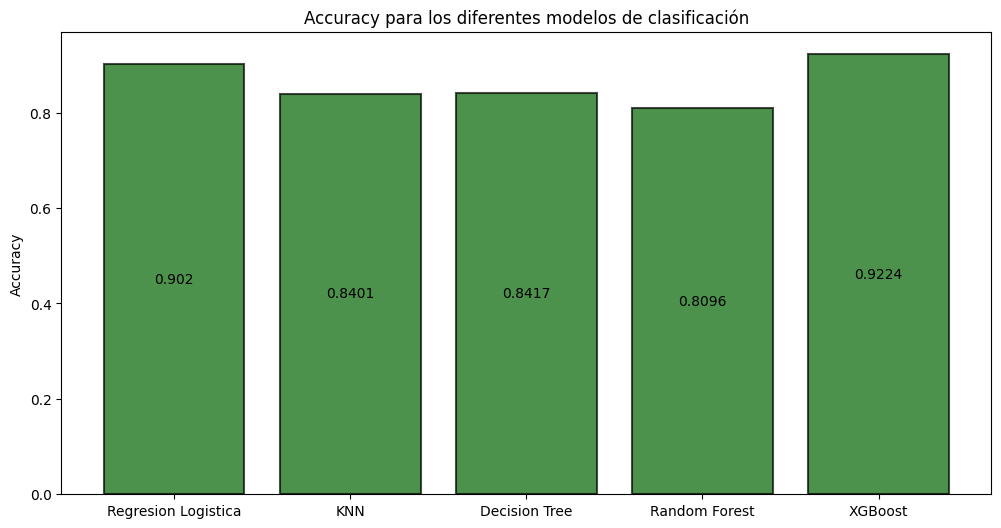

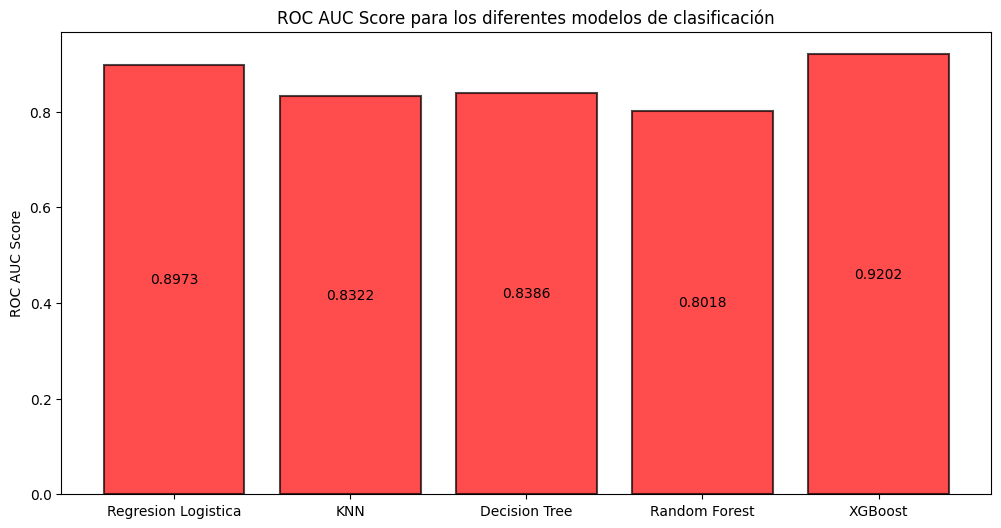

In [575]:
# Definir los nombres de los modelos y sus respectivas métricas
model_names = ['Regresion Logistica', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [clfAccuracy, knnModelAccuracy, TreeModelAccuracy, RandomForestTreeAccuracy, ArbolXgbAccuracy]
roc_auc_scores = [clfRocAuc, knnModelRocAuc, TreeModelRoCAUC, RandomForestTreeRocAuc, ArbolXGBRocAuc]

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracy_scores, color='darkgreen', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('Accuracy')
plt.title('Accuracy para los diferentes modelos de clasificación')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')

plt.show()

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, roc_auc_scores, color='red', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('ROC AUC Score')
plt.title('ROC AUC Score para los diferentes modelos de clasificación')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()

## Tpr, fpr y precision

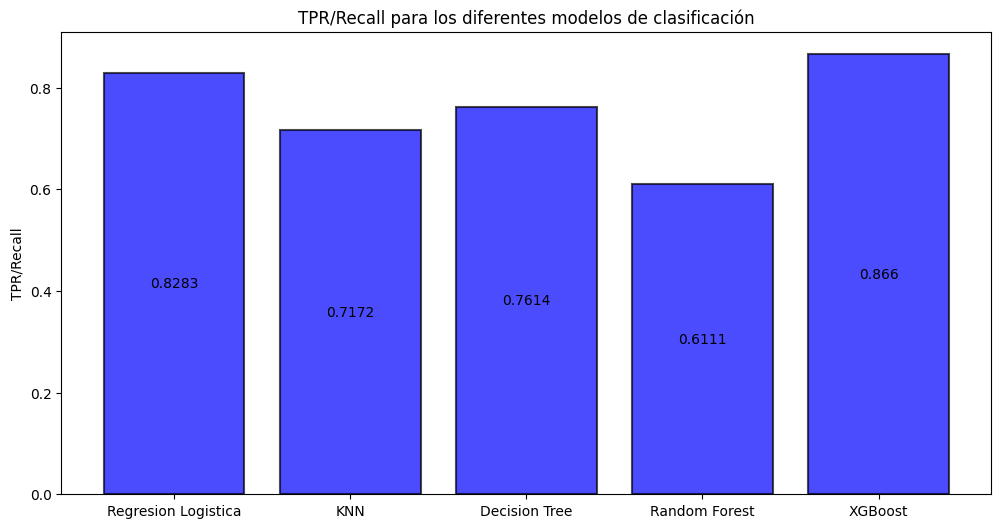

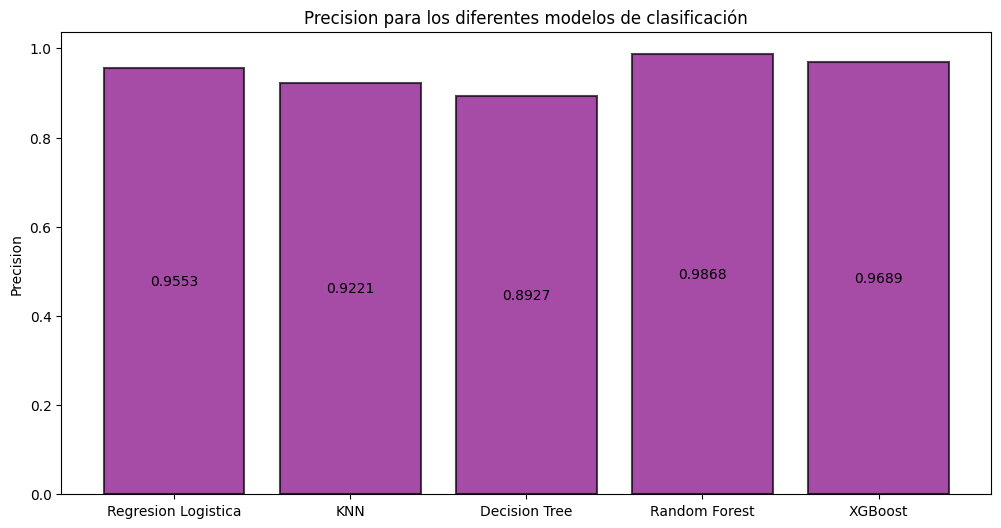

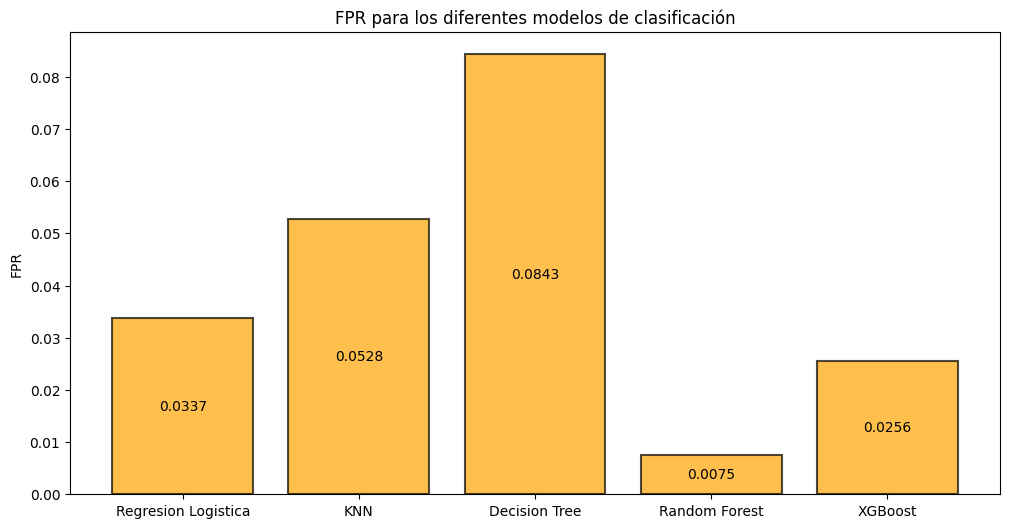

In [576]:
tprScores = [clfTpr, knnModelTpr, TreeModelTpr, RandomForestTreeTpr, ArbolXGBTpr]
precisionScores = [clfPrecision, knnModelPrecision, TreeModelPrecision, RandomForestTreePrecision, ArbolXGBPrecision]
fprScores = [clfFpr, knnModelFpr, TreeModelFpr, RandomForestTreeFpr, ArbolXGBFpr]


plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, tprScores, color='blue', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('TPR/Recall')
plt.title('TPR/Recall para los diferentes modelos de clasificación')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, precisionScores, color='purple', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('Precision')
plt.title('Precision para los diferentes modelos de clasificación')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, fprScores, color='orange', alpha=0.7, width=0.8, align='center', edgecolor='black', linewidth=1.5, capsize=0.5, ecolor='black')
plt.ylabel('FPR')
plt.title('FPR para los diferentes modelos de clasificación')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, round(yval, 4), ha='center', va='center', color='black')
plt.show()

